In [21]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist  
from sklearn.cluster import KMeans 
# tạo các random giống nhau cho mọi lần gọi
np.random.seed(11)

In [22]:
means=[[2,2], [8,3], [3,6]]
cov=[[1,0], [0,1]]
N=500
# tạo ngẫu nhiên vector nhiều chiều theo phân phối chuẩn
X0=np.random.multivariate_normal(means[0], cov, N)
X1=np.random.multivariate_normal(means[1], cov, N)
X2=np.random.multivariate_normal(means[2], cov, N)
# Gộp các ma trận theo cột thành ma trận X 
X=np.concatenate((X0, X1, X2),axis=0)
K=3
# tạo nhãn ứng với các ma trận X0, X1, X2
original_label=np.asarray([0]*N+[1]*N+[2]*N).T

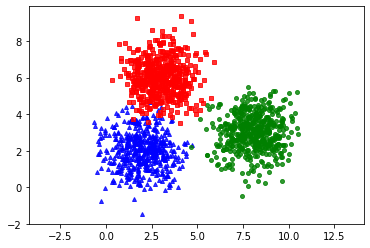

In [23]:
def kmeans_display(X, label):
    
    K=np.amax(label)+1
    # tách các ma trận từ X theo label
    X0=X[label==0,:]
    X1=X[label==1,:]
    X2=X[label==2,:]
    # Vẽ các cluster X0, X1, X2
    plt.plot(X0[:,0], X0[:, 1], 'b^', markersize=4, alpha=.8)
    plt.plot(X1[:,0], X1[:, 1], 'go', markersize=4, alpha=.8)
    plt.plot(X2[:,0], X2[:, 1], 'rs', markersize=4, alpha=.8)
    
    plt.axis('equal')
    plt.plot()
    plt.show()
kmeans_display(X, original_label)

[array([2, 2, 1, ..., 0, 0, 0])]
[array([2, 2, 1, ..., 0, 0, 0]), array([1, 1, 1, ..., 0, 0, 0])]
[array([2, 2, 1, ..., 0, 0, 0]), array([1, 1, 1, ..., 0, 0, 0]), array([1, 1, 1, ..., 0, 0, 0])]
[array([2, 2, 1, ..., 0, 0, 0]), array([1, 1, 1, ..., 0, 0, 0]), array([1, 1, 1, ..., 0, 0, 0]), array([1, 1, 1, ..., 0, 0, 0])]
[array([2, 2, 1, ..., 0, 0, 0]), array([1, 1, 1, ..., 0, 0, 0]), array([1, 1, 1, ..., 0, 0, 0]), array([1, 1, 1, ..., 0, 0, 0]), array([1, 1, 1, ..., 0, 0, 0])]
[array([2, 2, 1, ..., 0, 0, 0]), array([1, 1, 1, ..., 0, 0, 0]), array([1, 1, 1, ..., 0, 0, 0]), array([1, 1, 1, ..., 0, 0, 0]), array([1, 1, 1, ..., 0, 0, 0]), array([1, 1, 1, ..., 0, 0, 0])]


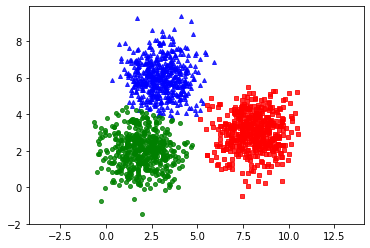

In [24]:
#Khhởi tạo các center ban đầu
def kmeans_init_center(X, k):
    # randomly pick k rows of X as initial centers
    return X[np.random.choice(X.shape[0], k, replace=False)]

#Gán nhãn mới cho các điểm khi biết các centers
def kmeans_assign_labels(X, centers):
    # calculate pairwise distances btw data and centers
    D=cdist(X, centers)
    # return index of the closest center
    return np.argmin(D, axis=1)

# để cập nhật các centers mới dựa trên dữ liệu được gán nhãn
def kmeans_update_centers(X, labels, K):
    centers=np.zeros((K, X.shape[1]))
    for k in range(K):
        # collect all points assigned to the K-th cluster
        Xk=X[labels==k, :]
        # take average
        centers[k, :]=np.mean(Xk, axis=0)
    return centers

# Kiểm tra điều kiện dừng của thuật toán
def has_converged(centers, new_centers):
    # return True if two sets of centers are the same
    return (set([tuple(a) for a in  centers])==set([tuple(a) for a in new_centers]))

def kmeans(X, K):
    centers=[kmeans_init_center(X,K)]
    labels=[]
    # print(centers)
    # print(X)
    it=0
    while True:
        labels.append(kmeans_assign_labels(X, centers[-1]))
        print(labels)
        new_centers=kmeans_update_centers(X, labels[-1], K)
        if has_converged(centers[-1], new_centers):
            break
        centers.append(new_centers)
        it+=1
    return (centers, labels, it)
(centers, labels, it)=kmeans(X, K)
# print("centers found by our algorithm: ")
# print(centers[-1])
# print(it)
# print(labels)
# print(labels[1])
kmeans_display(X, labels[-1])

Center found by scikit-learn: 
[[8.0410628  3.02094748]
 [1.97689714 2.00258549]
 [2.98896909 6.0286196 ]]


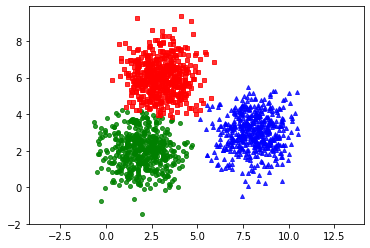

In [25]:
# sử dụng thư viện scikit-learn
kmeans=KMeans(n_clusters=3, random_state=0).fit(X)
print('Center found by scikit-learn: ')
print(kmeans.cluster_centers_)
pred_label=kmeans.predict(X)
kmeans_display(X, pred_label)